In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
import cv2
import os

In [2]:
path = "data/charts/train_val/"
excel_path = "data/charts/train_val.csv"

files = os.listdir(path)
df = pd.read_csv(excel_path)
df.head(5)

,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical


In [3]:
sorted_files = []

for file in files:
    l = np.int64(file[0:file.find(".png")])
    sorted_files.append(l)
    sorted_files.sort()
    
x = []
y = []
for file_index in sorted_files:
    img = cv2.imread(path+str(file_index)+".png",0)
    x.append(img)
    y.append(df['type'][file_index])


In [4]:
x = np.array(x)
y = np.array(y)
x.shape

(1000, 128, 128)

In [5]:
x = x.astype("float32") / 255.0
x

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

'dot_line'

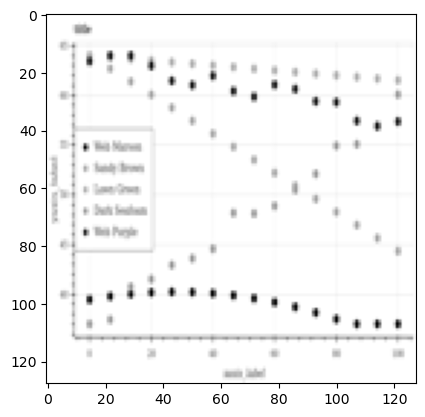

In [6]:
plt.imshow(x[999],cmap="gray")
y[999]

In [7]:
labels = df['type'].unique()
num_classes = len(labels)

c=0
dict={}
for l in labels:
    dict[l]=c
    c=c+1

dict

{'vbar_categorical': 0,
 'hbar_categorical': 1,
 'line': 2,
 'pie': 3,
 'dot_line': 4}

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2,
random_state=4)

In [9]:
x_train.shape, y_train.shape , x_test.shape, y_test.shape

((800, 128, 128), (800,), (200, 128, 128), (200,))

In [10]:
y_train_numeric = np.array([dict[lbl] for lbl in y_train])
y_train_onehot = to_categorical(y_train_numeric,num_classes)
y_train_onehot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax')
])


In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train_onehot, epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 5s 168ms/step - loss: 5.5305 - accuracy: 0.3212
Epoch 2/10
25/25 [==============================] - 4s 163ms/step - loss: 0.7963 - accuracy: 0.7600
Epoch 3/10
25/25 [==============================] - 4s 161ms/step - loss: 0.3458 - accuracy: 0.8875
Epoch 4/10
25/25 [==============================] - 4s 165ms/step - loss: 0.2082 - accuracy: 0.9500
Epoch 5/10
25/25 [==============================] - 5s 185ms/step - loss: 0.1548 - accuracy: 0.9613
Epoch 6/10
25/25 [==============================] - 5s 189ms/step - loss: 0.1184 - accuracy: 0.9787
Epoch 7/10
25/25 [==============================] - 4s 166ms/step - loss: 0.0954 - accuracy: 0.9887
Epoch 8/10
25/25 [==============================] - 4s 180ms/step - loss: 0.0820 - accuracy: 0.9962
Epoch 9/10
25/25 [==============================] - 5s 201ms/step - loss: 0.0654 - accuracy: 0.9975
Epoch 10/10
25/25 [==============================] - 5s 183ms/step - loss: 0.0561 - accuracy: 0.9975

In [14]:
y_test_numeric = np.array([dict[lbl] for lbl in y_test])
y_test_onehot = to_categorical(y_test_numeric,num_classes)
y_test_onehot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1.

In [15]:
loss, accuracy = model.evaluate(x_test, y_test_onehot)

7/7 [==============================] - 0s 40ms/step - loss: 0.1477 - accuracy: 0.9400


# 2 Layer CNN

In [16]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [17]:
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model_2.fit(x_train, y_train_onehot, epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 16s 564ms/step - loss: 1.8567 - accuracy: 0.3900
Epoch 2/10
25/25 [==============================] - 12s 460ms/step - loss: 0.4807 - accuracy: 0.8388
Epoch 3/10
25/25 [==============================] - 11s 436ms/step - loss: 0.1686 - accuracy: 0.9475
Epoch 4/10
25/25 [==============================] - 11s 434ms/step - loss: 0.0681 - accuracy: 0.9837
Epoch 5/10
25/25 [==============================] - 11s 447ms/step - loss: 0.0300 - accuracy: 0.9950
Epoch 6/10
25/25 [==============================] - 11s 435ms/step - loss: 0.0198 - accuracy: 0.9987
Epoch 7/10
25/25 [==============================] - 11s 437ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 8/10
25/25 [==============================] - 11s 426ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 9/10
25/25 [==============================] - 10s 401ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 10/10
25/25 [==============================] - 12s 471ms/step - loss: 0.0021 - accura

# AlexNet

In [19]:
input_shape = (227, 227, 3)

alexNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [25]:
alexNet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
alexNet.fit(x_train, y_train_onehot, epochs=10, batch_size=32)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 227, 227, 3), found shape=(32, 128, 128)


In [22]:
x_train_resized = []
for image in x_train:
    resized_image = cv2.resize(image, (227, 227))
    x_train_resized.append(resized_image)
x_train_resized = np.array(x_train_resized)
x_train_resized

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [23]:
x_train_resized = np.expand_dims(x_train_resized, axis=-1)
x_train_resized = np.repeat(x_train_resized, 3, axis=-1)

In [26]:
alexNet.fit(x_train_resized, y_train_onehot, epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 36s 1s/step - loss: 1.9547 - accuracy: 0.1813
Epoch 2/10
25/25 [==============================] - 35s 1s/step - loss: 1.6213 - accuracy: 0.2550
Epoch 3/10
25/25 [==============================] - 34s 1s/step - loss: 1.6201 - accuracy: 0.3137
Epoch 4/10
25/25 [==============================] - 34s 1s/step - loss: 1.7345 - accuracy: 0.1875
Epoch 5/10
25/25 [==============================] - 42s 2s/step - loss: 1.6107 - accuracy: 0.2050
Epoch 6/10
25/25 [==============================] - 37s 1s/step - loss: 1.6100 - accuracy: 0.2013
Epoch 7/10
25/25 [==============================] - 36s 1s/step - loss: 2.1916 - accuracy: 0.2675
Epoch 8/10
25/25 [==============================] - 37s 1s/step - loss: 1.6700 - accuracy: 0.3313
Epoch 9/10
25/25 [==============================] - 41s 2s/step - loss: 1.0054 - accuracy: 0.5050
Epoch 10/10
25/25 [==============================] - 44s 2s/step - loss: 0.7880 - accuracy: 0.6112


In [34]:
x_test_resized = []
for image in x_test:
    resized_image = cv2.resize(image, (227, 227))
    x_test_resized.append(resized_image)
x_test_resized = np.array(x_test_resized)

In [35]:
x_test_resized = np.expand_dims(x_test_resized, axis=-1)
x_test_resized = np.repeat(x_test_resized, 3, axis=-1)

In [36]:
test_loss, test_acc = alexNet.evaluate(x_test_resized, y_test_onehot)
print('Test accuracy:', test_acc)

7/7 [==============================] - 1s 171ms/step - loss: 0.5292 - accuracy: 0.6950
Test accuracy: 0.6949999928474426
